## Sección 13: Random Forest en Machine Learning

<details>
<summary><strong>📊 RFC</strong></summary>
<ul>
    <li>Random Forest es una <strong>combinación de árboles de decisión</strong>, donde cada árbol selecciona una clase y luego se combinan las decisiones de cada árbol, para seleccionar una clase final ganadora.</li>
    <li>Es uno de los algoritmos de aprendizaje de clasificación más populares y mayor presción.</li>
    <li>Funciona eficientemente en bases de datos grandes y tiene una alta precisión.</li>
    <li>Puede manejar cientos de variables de entrada.</li>
</ul>
    
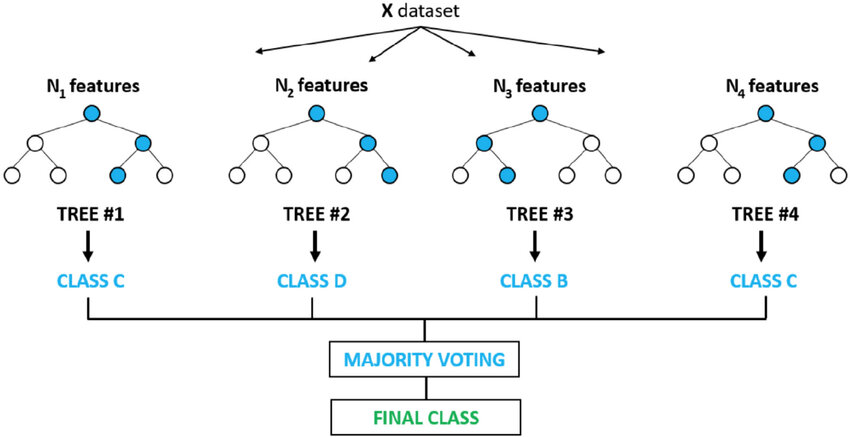
</details>

---
### Ejemplo Random Forest - Clasificación

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
cd ../resources/datasets/

/home/aramos-m/Escritorio/IBM_AI/resources/datasets


In [29]:
vinos = pd.read_csv("vinos.csv")
vinos.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,One
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,One
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,One
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,One
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,One


In [33]:
X = vinos.drop("Wine Type", axis=1)
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [37]:
y = vinos["Wine Type"]
y.head()

0    One
1    One
2    One
3    One
4    One
Name: Wine Type, dtype: object

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
randomforest = RandomForestClassifier(n_estimators=80) # Número de árboles de decisión

In [55]:
randomforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80)

In [59]:
predicciones = randomforest.predict(X_test)
predicciones

array(['One', 'Two', 'Two', 'One', 'Two', 'Three', 'Three', 'Two', 'Two',
       'Two', 'One', 'One', 'One', 'Three', 'One', 'Two', 'One', 'Two',
       'Three', 'Three', 'One', 'Two', 'Three', 'Two', 'Three', 'One',
       'Three', 'Three', 'Three', 'Three', 'Two', 'Three', 'Two', 'Two',
       'One', 'Three', 'One', 'One', 'Three', 'Two', 'Two', 'One', 'One',
       'Three', 'One', 'Three', 'Two', 'Three', 'One', 'One', 'One',
       'Three', 'Two', 'Three'], dtype=object)

In [63]:
y_test.head(10)

56       One
84       Two
86       Two
73       Two
88       Two
160    Three
145    Three
80       Two
110      Two
117      Two
Name: Wine Type, dtype: object

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
print(classification_report(y_test, predicciones)) # Funciona mejor que DTs para este dataset

              precision    recall  f1-score   support

         One       0.94      1.00      0.97        17
       Three       0.89      1.00      0.94        17
         Two       1.00      0.85      0.92        20

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



In [71]:
print(confusion_matrix(y_test, predicciones))

[[17  0  0]
 [ 0 17  0]
 [ 1  2 17]]
